# Generalization with OOP: The MeanRevBacktester Class

## Using the MeanRevBacktester Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2018-01-01 22:00:00+00:00,1.201205,1.351705,1.533390
2018-01-02 04:00:00+00:00,1.207055,1.354830,1.540480
2018-01-02 10:00:00+00:00,1.204440,1.357860,1.537980
2018-01-02 16:00:00+00:00,1.205800,1.359180,1.540185
2018-01-02 22:00:00+00:00,1.204690,1.359530,1.542225
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,1.311810,1.602420
2019-12-30 04:00:00+00:00,1.119940,1.311880,1.600800
2019-12-30 10:00:00+00:00,1.120095,1.311465,1.601165


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  2070 non-null   float64
 1   GBPUSD  2074 non-null   float64
 2   EURAUD  2071 non-null   float64
dtypes: float64(3)
memory usage: 64.8 KB


In [4]:
ptc = 0.00007

In [5]:
import MeanRevBacktester as MeanRev

In [6]:
tester = MeanRev.MeanRevBacktester("EURUSD", 30, 2, "2018-01-01", "2019-12-31", ptc)

In [7]:
tester

MeanRevBacktester(symbol = EURUSD, SMA = 30, dev = 2, start = 2018-01-01, end = 2019-12-31)

In [8]:
tester.test_strategy()

(1.069792, 0.132076)

In [9]:
tester.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2018-01-11 10:00:00+00:00,1.204915,0.008455,1.200628,1.190841,1.210415,0.004287,0.0,0.000000,0.0,1.008491,1.000000
2018-01-11 16:00:00+00:00,1.203205,-0.001420,1.200500,1.190964,1.210035,0.002705,0.0,-0.000000,0.0,1.007060,1.000000
2018-01-11 22:00:00+00:00,1.205165,0.001628,1.200524,1.190943,1.210104,0.004641,0.0,0.000000,0.0,1.008700,1.000000
2018-01-12 04:00:00+00:00,1.212530,0.006093,1.200748,1.190374,1.211122,0.011782,-1.0,-0.000070,1.0,1.014865,0.999930
2018-01-12 10:00:00+00:00,1.214820,0.001887,1.201086,1.189583,1.212589,0.013734,-1.0,-0.001887,0.0,1.016781,0.998045
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111391,1.105215,1.117567,0.008529,-1.0,-0.002092,0.0,0.937352,1.070207
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111553,1.104754,1.118352,0.008387,-1.0,-0.000018,0.0,0.937369,1.070188
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111777,1.104318,1.119235,0.008318,-1.0,-0.000138,0.0,0.937498,1.070040


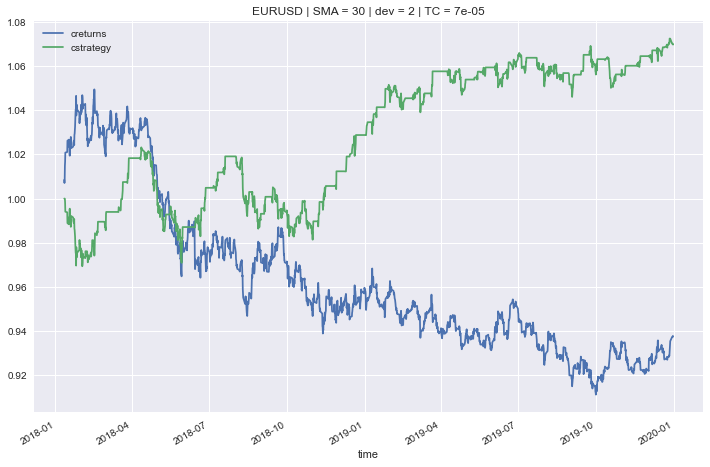

In [10]:
tester.plot_results()

In [11]:
tester.optimize_parameters((25, 100, 1), (1, 5, 1))

((58, 1), 1.238111)

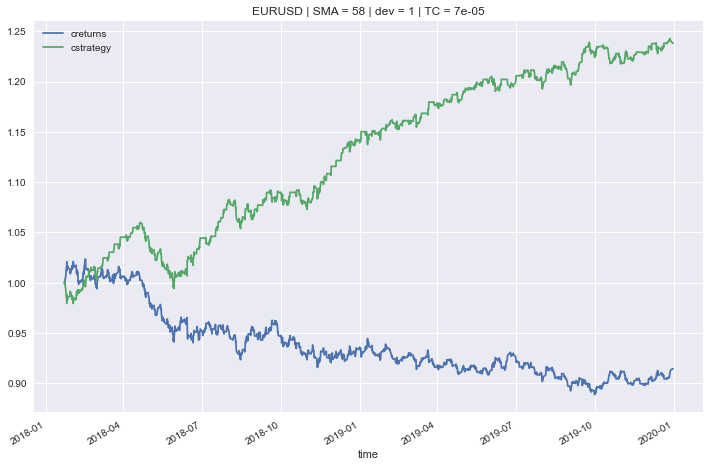

In [12]:
tester.plot_results()

In [13]:
tester.results

,price,returns,SMA,Lower,Upper,distance,position,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,
2018-01-22 10:00:00+00:00,1.225370,0.000343,1.210748,1.198848,1.222648,0.014622,-1.0,-0.000343,0.0,1.000343,0.999657
2018-01-22 16:00:00+00:00,1.226135,0.000624,1.211077,1.199018,1.223136,0.015058,-1.0,-0.000624,0.0,1.000967,0.999034
2018-01-22 22:00:00+00:00,1.225780,-0.000290,1.211445,1.199267,1.223623,0.014335,-1.0,0.000290,0.0,1.000678,0.999323
2018-01-23 04:00:00+00:00,1.223765,-0.001645,1.211755,1.199495,1.224015,0.012010,-1.0,0.001645,0.0,0.999033,1.000968
2018-01-23 10:00:00+00:00,1.229295,0.004509,1.212179,1.199743,1.224614,0.017116,-1.0,-0.004509,0.0,1.003547,0.996465
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,1.111350,1.107982,1.114718,0.008570,-1.0,-0.002092,0.0,0.914258,1.238592
2019-12-30 04:00:00+00:00,1.119940,0.000018,1.111591,1.108116,1.115065,0.008349,-1.0,-0.000018,0.0,0.914274,1.238569
2019-12-30 10:00:00+00:00,1.120095,0.000138,1.111843,1.108291,1.115395,0.008252,-1.0,-0.000138,0.0,0.914401,1.238398


In [14]:
tester.results_overview

,SMA,dev,performance
0,25,1,0.995746
1,25,2,1.050603
2,25,3,1.039728
3,25,4,1.000000
4,26,1,0.995291
...,...,...,...
295,98,4,1.000000
296,99,1,1.166676
297,99,2,1.168985
298,99,3,1.018584


In [15]:
tester.results_overview.nlargest(10, "performance")

,SMA,dev,performance
132,58,1,1.238111
136,59,1,1.231034
148,62,1,1.230248
152,63,1,1.229423
128,57,1,1.228237
144,61,1,1.225364
116,54,1,1.223270
156,64,1,1.223054
140,60,1,1.222840
172,68,1,1.217669


In [16]:
tester.results_overview.nsmallest(10, "performance")

,SMA,dev,performance
4,26,1,0.995291
0,25,1,0.995746
30,32,3,0.999410
3,25,4,1.000000
7,26,4,1.000000
11,27,4,1.000000
15,28,4,1.000000
19,29,4,1.000000
23,30,4,1.000000
27,31,4,1.000000


__Backtesting & Forward Testing__

In [17]:
train = MeanRev.MeanRevBacktester("EURUSD", 30, 2, "2018-01-01", "2018-12-31", ptc)

In [18]:
train.optimize_parameters((25, 100, 1), (1, 5, 1)) # in-sample

((74, 1), 1.151185)

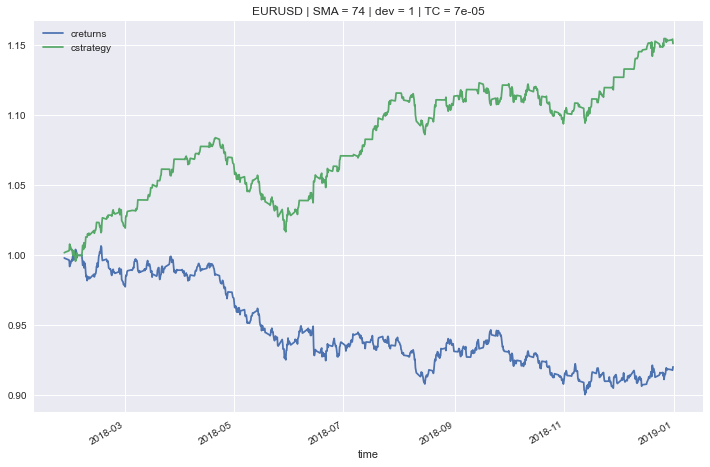

In [19]:
train.plot_results() # in-sample

In [20]:
tester = MeanRev.MeanRevBacktester("EURUSD", 74, 1, "2019-01-01", "2019-12-31", ptc) # out-sample

In [21]:
tester.test_strategy()

(1.040341, 0.058301)

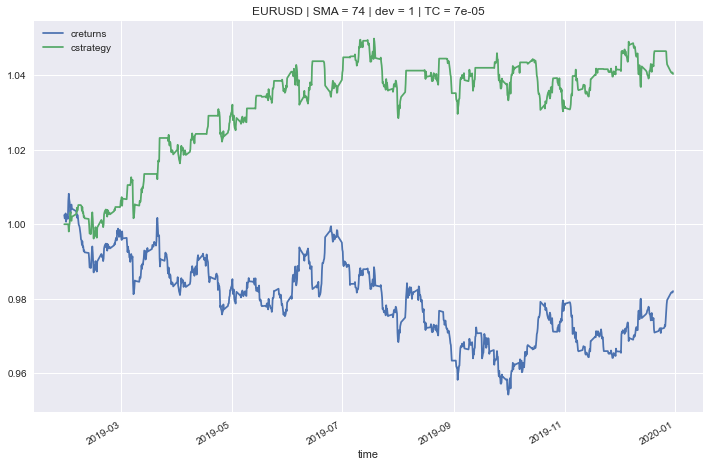

In [22]:
tester.plot_results()

__GBP/USD__

In [23]:
tester = MeanRev.MeanRevBacktester("GBPUSD", 30, 2, "2018-01-01", "2019-12-31", 0)

In [24]:
tester.test_strategy()

(1.004615, 0.031372)

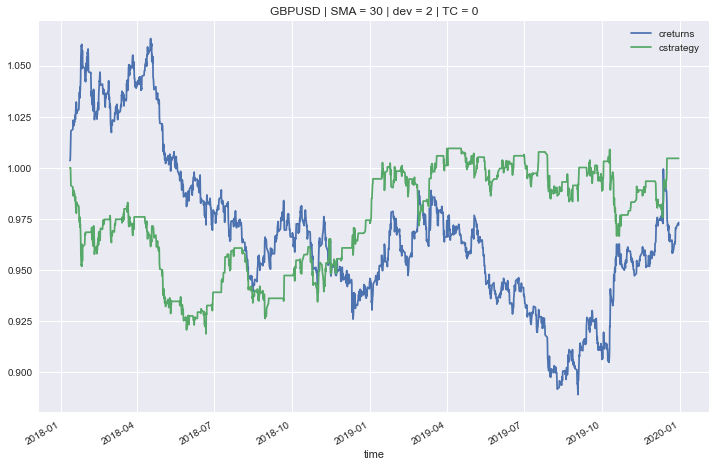

In [25]:
tester.plot_results()

In [26]:
tester.optimize_parameters((25, 100, 1), (1, 5, 1))

((79, 1), 1.178929)

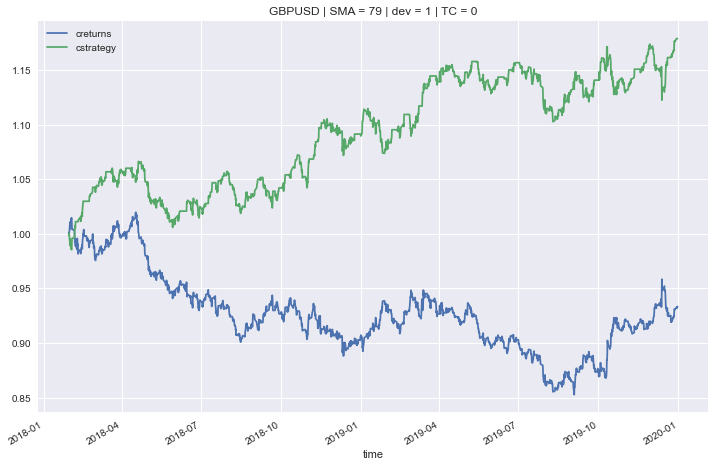

In [27]:
tester.plot_results()

In [28]:
train = MeanRev.MeanRevBacktester("GBPUSD", 30, 2, "2018-01-01", "2018-12-31", ptc)
train.optimize_parameters((25, 100, 1), (1, 5, 1))

((78, 1), 1.092762)

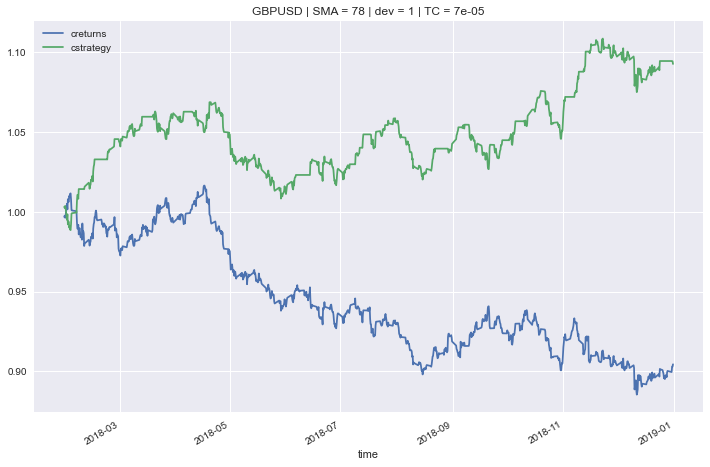

In [29]:
train.plot_results() 

In [33]:
tester = MeanRev.MeanRevBacktester("GBPUSD", 78, 1, "2019-01-01", "2019-12-31", ptc)
tester.test_strategy()

(1.063, 0.06608)

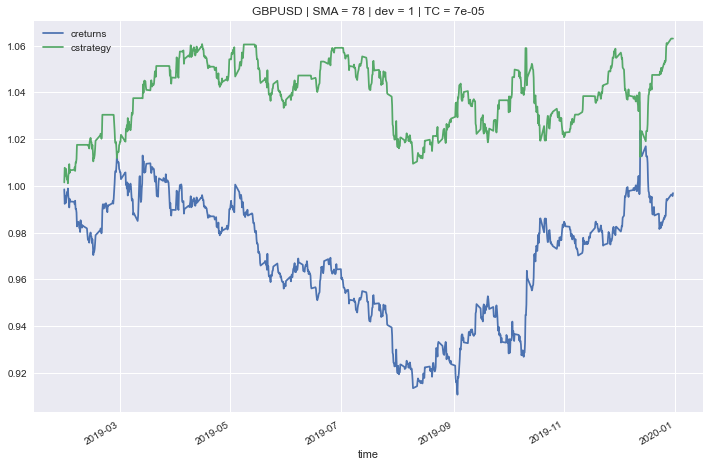

In [34]:
tester.plot_results()